In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
plt.rcParams['figure.figsize'] = [8,8]

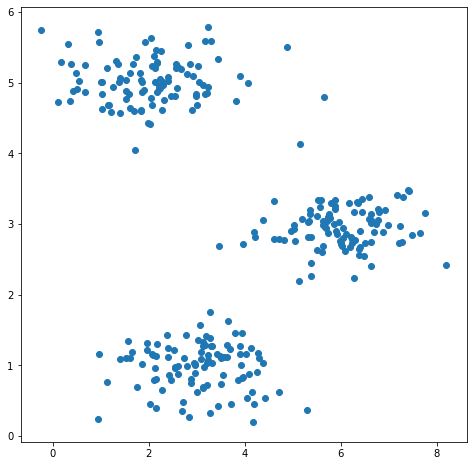

In [3]:
data = loadmat('ex7data2.mat')
X = data['X']
plt.scatter(X[:,0], X[:,1])

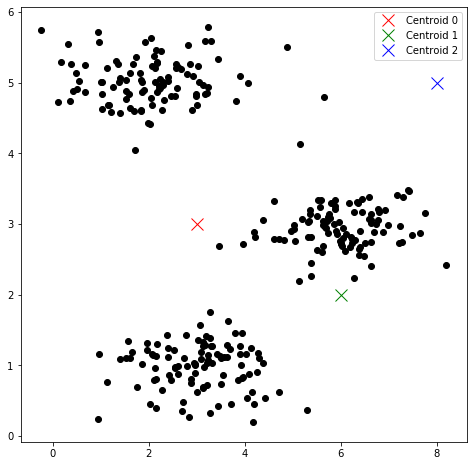

In [4]:
K = 3
plot_point = ['rx', 'gx', 'bx']
color_list = ['r', 'g', 'b']
initial_centroids = np.array([
    [3, 3],
    [6, 2],
    [8, 5]
])
centroids = initial_centroids
plt.scatter(X[:,0], X[:,1], marker='o', c='black')
for i, c in enumerate(initial_centroids):
    plt.plot(initial_centroids[i][0], initial_centroids[i][1], plot_point[i], label='Centroid {}'.format(i), markersize=12)
plt.legend()

In [5]:
def find_cluster_index(X, centroids):
    dist_matrix = np.sum(X ** 2, axis=1).reshape(-1, 1) + np.sum(centroids ** 2, axis=1) - 2 * X.dot(centroids.T)
    cluster_index = np.argmin(dist_matrix, axis=1)
    return cluster_index

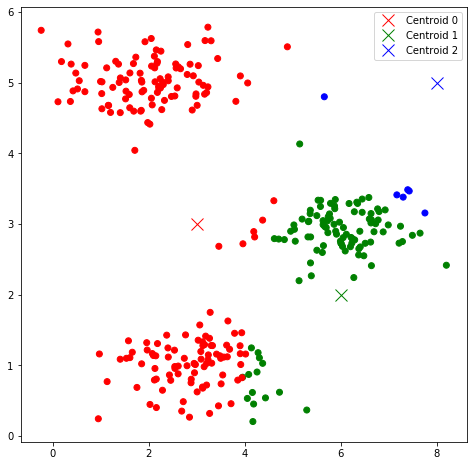

In [6]:
cluster_index = find_cluster_index(X, initial_centroids)
colors = [color_list[i] for i in cluster_index]
plt.scatter(X[:,0], X[:,1], marker='o', c=colors)
for i, c in enumerate(initial_centroids):
    plt.plot(initial_centroids[i][0], initial_centroids[i][1], plot_point[i], label='Centroid {}'.format(i), markersize=12)
plt.legend()

In [24]:
def update_centroids(X, cluster_index, centroids):
    new_centroids = centroids.copy()
    for i in range(len(centroids)):
        index = np.where(cluster_index==i)[0]
        if len(index) > 0:
            new_centroids[i] = X[index].mean(axis=0)
    return new_centroids

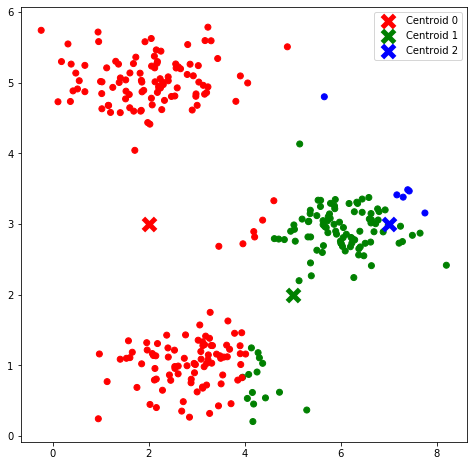

In [8]:
centroids = update_centroids(X, cluster_index, centroids)
plt.scatter(X[:,0], X[:,1], marker='o', c=colors)
for i, c in enumerate(initial_centroids):
    plt.scatter(centroids[i][0], centroids[i][1], c=color_list[i], marker='x', label='Centroid {}'.format(i), s=150, linewidth=5)
plt.legend()

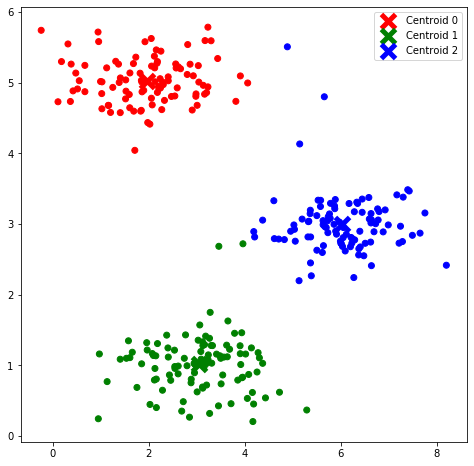

In [9]:
repeats = 10
initial_centroids = np.array([
    [3.0, 3.0],
    [6.0, 2.0],
    [8.0, 5.0]
])
centroids = initial_centroids
for i in range(repeats):
    cluster_index = find_cluster_index(X, centroids)
    centroids = update_centroids(X, cluster_index, centroids)
colors = [color_list[i] for i in cluster_index]
plt.scatter(X[:,0], X[:,1], marker='o', c=colors)
for i, c in enumerate(initial_centroids):
    plt.scatter(centroids[i][0], centroids[i][1], c=color_list[i], marker='x', label='Centroid {}'.format(i), s=200, linewidth=5)
plt.legend()

In [10]:
def random_select_centroids(X, K):
    index = np.random.choice(range(len(X)), K)
    return X[index]

In [11]:
random_select_centroids(X, 3)

array([[2.71730799, 0.48697555],
       [3.08349136, 1.19632644],
       [5.02432984, 2.98683179]])

In [12]:
bird_mat = loadmat('bird_small.mat')

In [19]:
img_mat = bird_mat['A'].reshape(-1, 3)

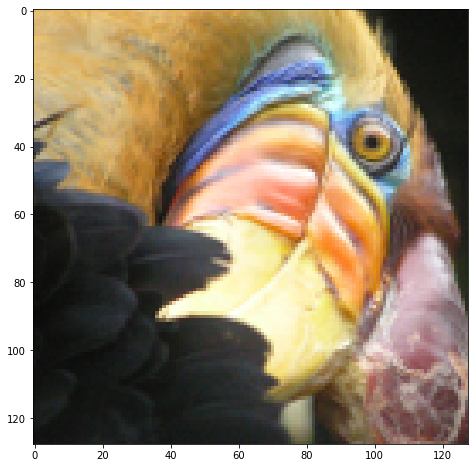

In [18]:
img = cv2.imread('bird_small.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [33]:
flat = img_mat.reshape(-1, 3)
K = 16
centroids = random_select_centroids(flat, K).astype('float')
repeats = 10
for i in range(repeats):
    cluster_index = find_cluster_index(flat, centroids)
    centroids = update_centroids(flat, cluster_index, centroids)
centroids = centroids.astype(np.uint8)

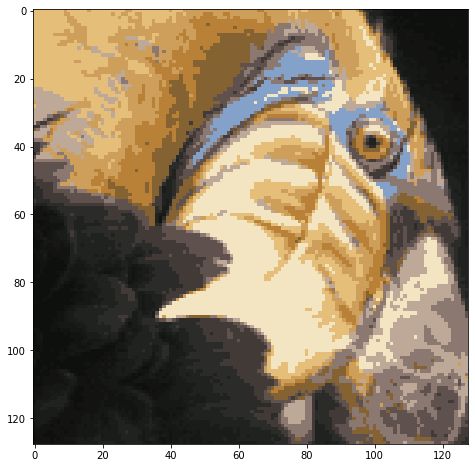

In [34]:
compress = flat.copy()
for i in range(len(flat)):
    compress[i] = centroids[cluster_index[i]]
compress = compress.reshape(128, 128, 3)
plt.imshow(compress)